<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/2_osciladores_acoplados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ondas y Óptica

### Oscilaciones acopladas: el caso de dos osciladores.


Prof.Mario I. Caicedo

---------------------------------------------

In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

-----------------------------------------------

# Sistema: 

## Dos osciladores acoplados
* Las posiciones de equilibrio de los osciladores son $0<eq_1<eq_2$
* $\xi_1,\xi_2\in\mathcal{R}$ son las desviaciones respecto al equilibrio 
* Las posiciones de los osciladores son $x_i=\xi+eq_1$ 
* La longitud de equilibrio del resorte de acoplamiento es $\ell=eq_2-eq_1$
* En consecuencia, las fuerzas ejercidas sobre cada punto material son:

$$\vec{F}_1=\left[-k_1(x_1-eq_1)+\kappa(x_2-x_1-\ell)\right]\,\hat{\mathbf{e}}_1=\left[-k_1(\xi_1+eq_1-eq_1)+\kappa(\xi_2+eq_2-\xi_1-eq_1-\ell)\right]\,\hat{\mathbf{e}}_1$$

$$\vec{F}_2=\left[-k_1(x_2-eq_2)-\kappa(x_2-x_1-\ell)\right]\,\hat{\mathbf{e}}_1$$

* La aceleración de cada partícula es 

$$\vec{a}_i=\ddot{x}_i\,\hat{\mathbf{e}}_i=\frac{d^2(\xi_i+eq_i)}{dt^2}=\ddot{\xi}_i\,\hat{\mathbf{e}}_i$$



---------------------------------------

### **RESUMEN**

* Fuerzas

$$\vec{F}_1=\left[-k_1\,\xi_1+\kappa(\xi_2-\xi_1)\right]\,\hat{\mathbf{e}}_1$$

$$\vec{F}_2=\left[-k_1\xi_2-\kappa(\xi_2-\xi_1\right]\,\hat{\mathbf{e}}_1$$

* Ecuaciones de movimiento

$$\ddot{\xi}_1=-\omega_1^2\,\xi_1+\frac{\kappa}{M_1}(\xi_2-\xi_1)$$

$$\ddot{\xi}_2=-\omega_2^2\,\xi_2-\frac{\kappa}{M_1}(\xi_2-\xi_1)$$

* Sistema de primer orden equivalente: 

LOs métodos numéricos están diseñados para resolver sistemas de ecuaciones diferenciales de **primer orden**

$$\dot{\xi}_1=v_1$$

$$\dot{v}_1=-\omega_1^2\,\xi_1+\frac{\kappa}{M_1}(\xi_2-\xi_1)$$

$$\dot{\xi}_2=v_2$$

$$\dot{v}_2=-\omega_2^2\,\xi_2-\frac{\kappa}{M_1}(\xi_2-\xi_1)$$

-----------------------------------------------

Definición del sistema de primer orden a travéd de una función de Python [este paso es absolutamente necesario para invocar al integrador]

In [ ]:
def derivs(xi, t):

    # xi[0] y xi2[2] son $\xi_1$ y $\xi_2$

    dydx = np.zeros_like(xi)

    delta=xi[2]-xi[0]

    dydx[0] = xi[1] # xi[1] is $\dot{\xi}_1$

    dydx[1] = -omega1_2*xi[0]+kappa*delta/M1

    dydx[2] = xi[3] # xi[3] is $\dot{\xi}_2$

    dydx[3] = -omega1_2*xi[2]-kappa*delta/M2

    return dydx

## Parámetros del sistema

* $k$ constantes de los resortes "duros"
* $\kappa$ constante del resorte suave
* $M_1,M_2$ masas de los puntos materiales
* $eq_1,eq_2$ posiciones de equilibrio de los puntos materiales
* $\ell_0=eq_2-eq_1$ longitud de equilibrio del resorte suave
* $\omega_{1}^2=k/M_1,\omega_{2}^2=k/M_2$

In [ ]:
k = 1.0  # Constante de resortes ''duros'' (Nw/m)
kappa = 0.5  # Constante del resorte 'suave' (o de acoplamiento)
M1 = 1.0  # masa 1 en kg
M2 = 1.0  # masa 2  en kg
eq_1=1.0 # Posición de equilibrio de la masa 1 (m)
eq_2=3.0 # Posición de eq. de la masa 2 (m)

# Cuadrados de las frecuencias angulares  naturales de ambos osciladores

omega1_2=k/M1 
omega2_2=k/M2

# Recordar que la longitud de equilibrio del resorte suave es

# ell0=eq2-eq1 

In [ ]:
# Creación de un arreglo de muestras de tiempo entre 0 y t_max 
# con una separación entre muestras (período de muestreo) dt (s)

t_max=30
dt = 0.05
t = np.arange(0.0,t_max, dt)

### Condiciones iniciales

* Para el modo lento (simétrico): desplazamientos iniciales idénticos y velocidades nulas

* Para el modo rápido (antisimétrico): desplazamientos de igual magnitud y signo opuesto, velocidades nulas 

In [ ]:
# x10 and x20 Posiciones iniciales
# v10 and v20 Velocidades iniciales 
#x10 = 0.+eq1

# Modo simétrico:
#x10=0.5
#v10 = 0.0
#x20=0.5
#v20 = 0.0

# Modo antisimétrico
x10=0.5
v10 = 0.0
x20=-0.5
v20 = 0.0

In [ ]:
# El estado inicial debe introducirse como un arreglo


# initial state
xi = [x10, v10, x20, v20]

Como integrador utilizaremos la funcion 
**odeint** de la biblioteca **scipy.integrate**

---



In [ ]:
y = integrate.odeint(derivs, xi, t)

x_1 = y[:, 0]

x_1 = [s + eq_1 for s in x_1]

x_2 = y[:, 2]

x_2 = [x + eq_2 for x in x_2]

Animación

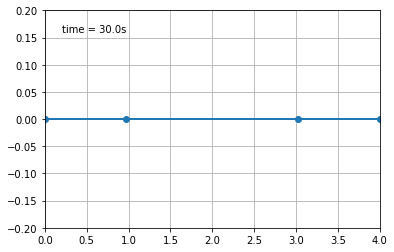

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0., 4.), ylim=(-0.2, 0.2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x_1[i], x_2[i],4.0]

    line.set_data(thisx, 0)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('xdouble_pendulum.mp4', fps=15)
#plt.show()